# Santa Clara County Airbnb Calendar Data Analysis and Visualization

In this analysis, I take a look at the Airbnb listing data on Santa Clara County, California, United States. The data set contains the availability and pricing information on all the Aribnb listings in Santa Clara from November 2019 to November 2020. I'd like to gain insights on the following questions from analyzing this dataset:

1. Locations of Airbnb listings
2. Q2

## Set Up Notebook and Workspace

In [209]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

In [210]:
# Load the data
df = pd.read_csv('http://data.insideairbnb.com/united-states/ca/santa-clara-county/2019-11-07/data/listings.csv.gz')

## Data Inspection and Preparation

In [211]:
df.shape

(7658, 106)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7658 entries, 0 to 7657
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 6.2+ MB


In [213]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,https://www.airbnb.com/rooms/4952,20191107231003,2019-11-07,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,none,"Located in Professorville, Palo Alto, one of t...",...,f,f,moderate,f,f,5,0,5,0,0.60
1,11464,https://www.airbnb.com/rooms/11464,20191107231003,2019-11-08,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Per...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Per...,none,10 min. to Lucky's and Starbucks at El Camino ...,...,t,f,moderate,f,t,15,15,0,0,0.09
2,19181,https://www.airbnb.com/rooms/19181,20191107231003,2019-11-08,Majestic Room #1 with Sauna and Large Family Room,Enjoy your privacy in this spacious and luxuri...,This is a lock-off guest unit in the lower lev...,Enjoy your privacy in this spacious and luxuri...,none,We are located in a 5-minute walk to downtown ...,...,f,f,moderate,t,t,3,1,2,0,0.11
3,21373,https://www.airbnb.com/rooms/21373,20191107231003,2019-11-07,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,"Bright, garden-facing room in beautiful home. ...",Room in gracious home with beautiful garden. ...,none,This room is in an ultra convenient location i...,...,f,f,moderate,f,f,5,0,5,0,2.16
4,23732,https://www.airbnb.com/rooms/23732,20191107231003,2019-11-07,Heart of Silicon Valley bdrm & bath,NaN,You'll have the room to yourself as well as a ...,You'll have the room to yourself as well as a ...,none,NaN,...,f,f,moderate,f,f,1,0,1,0,0.03


In [214]:
# Columns with the most missing values
df.isna().mean().sort_values().tail(20)

review_scores_value             0.187386
jurisdiction_names              0.191564
security_deposit                0.205145
space                           0.247323
host_about                      0.328415
house_rules                     0.333377
neighborhood_overview           0.378036
interaction                     0.409376
access                          0.414991
transit                         0.423087
notes                           0.487595
monthly_price                   0.910943
weekly_price                    0.916166
square_feet                     0.995952
thumbnail_url                   1.000000
license                         1.000000
medium_url                      1.000000
neighbourhood_group_cleansed    1.000000
host_acceptance_rate            1.000000
xl_picture_url                  1.000000
dtype: float64

In [215]:
# Columns contain keywords "review"
df.filter(like='score', axis=1).isna().mean()

review_scores_rating           0.186994
review_scores_accuracy         0.187125
review_scores_cleanliness      0.187125
review_scores_checkin          0.187386
review_scores_communication    0.187255
review_scores_location         0.187255
review_scores_value            0.187386
dtype: float64

In [216]:
## Numerical columns
df.select_dtypes(exclude = 'object').columns

Index(['id', 'scrape_id', 'thumbnail_url', 'medium_url', 'xl_picture_url',
       'host_id', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'guests_included', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'c

In [217]:
# Str columns
df.select_dtypes(include = 'object').columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'picture_url',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'requires_license', 'jurisdictio

## Number of Listings and Pricings by Zipcode

In [218]:
# clean up zipcode column data (i.e. "CA 94041" ---> "94041")
df['zipcode'] = df['zipcode'].str.extract(pat = '(9+[0-9]{4})')
df.groupby('zipcode')['id'].count().sort_values(ascending = False)

zipcode
94306    369
95112    344
95014    307
95035    306
94043    291
        ... 
94115      1
94526      1
94028      1
95009      1
95215      1
Name: id, Length: 64, dtype: int64

In [181]:
# convert listing price from obj. to float
df['price'] = df['price'].replace('[^.0-9]', '', regex=True).astype(float)


,zipcode,price
0,94301,90.0
1,95051,85.0
2,95070,100.0
3,94301,99.0
4,94043,299.0
...,...,...
7653,94303,85.0
7654,95051,160.0
7655,94086,270.0
7656,95118,105.0


In [219]:
df[df['zipcode'].isna()][['latitude','longitude','zipcode']]

,latitude,longitude,zipcode
156,37.42111,-122.15312,NaN
200,37.15116,-121.98852,NaN
277,37.35257,-122.05682,NaN
407,37.31950,-121.95730,NaN
584,37.37475,-122.07304,NaN
...,...,...,...
6387,37.39008,-122.01894,NaN
6408,37.23498,-121.96323,NaN
6446,37.39367,-121.94926,NaN
6641,37.37573,-122.06113,NaN


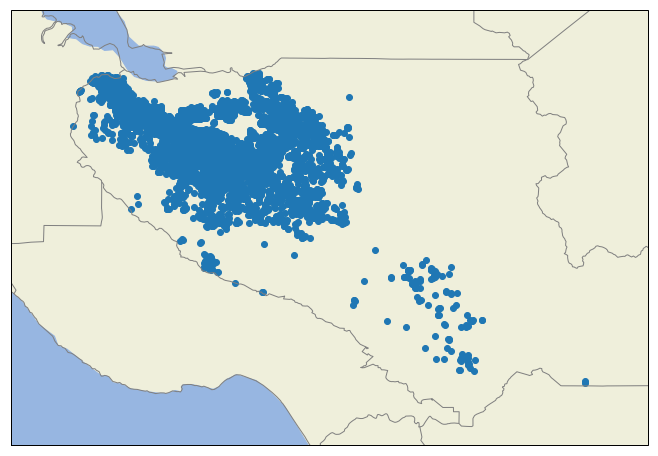

In [273]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

fname = 'data/countyl010g_shp_nt00964/countyl010g.shp'
reader = shpreader.Reader(fname)
counties = list(reader.geometries())
COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())


plt.figure(figsize=(18, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND.with_scale('10m'))
ax.add_feature(cfeature.OCEAN.with_scale('10m'))
ax.add_feature(cfeature.LAKES.with_scale('10m'))
ax.add_feature(COUNTIES, facecolor='None', edgecolor='gray')



BBox = [df.longitude.min()-0.1, df.longitude.max()+0.1,
        df.latitude.min()-0.1, df.latitude.max()+0.1]

ax.set_extent(BBox)
plt.scatter(x = df['longitude'], y = df['latitude'], transform = ccrs.PlateCarree())





In [ ]:
# cut the review_scores_rating into 10 bins
bins = list(range(0,110,10))
lst_df['ratings']=pd.cut(lst_df['review_scores_rating'],bins)


In [ ]:
# How many listings fall under each rating
lst_df.groupby('ratings').count()['id'].plot(kind = 'bar')

### Is higher rated listing more expensive?

In [ ]:
# convert price column data type from object to float
lst_df['price'] = lst_df['price'].replace('[\$,]', '', regex=True).astype(float)

# plot average listing price against review scores
lst_df.groupby('ratings')[['price']].mean().plot(kind = 'bar')


### How does host response time impact customer satisfaction?

In [ ]:
lst_df.groupby('host_response_time').mean()['review_scores_rating'].plot.bar()

### Most expensive zipcode

In [ ]:
lst_df.groupby(['zipcode'])['price'].agg(['mean','count']).sort_values('mean', ascending = False)

### Does super host's room command a premium

In [ ]:
lst_df.groupby(['host_is_superhost'])['review_scores_rating'].agg(['mean','count']).sort_values('mean', ascending = False)

In [ ]:
lst_df.groupby(['host_is_superhost'])['price'].agg(['mean','count']).sort_values('mean', ascending = False)